# Лабораторная работа №1. Python и визуалилизация данных#
#### Заполните код в клетках (где написано "Ваш код здесь")

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import matplotlib.patches as patches
from collections import Counter,OrderedDict
%matplotlib inline

### Считайте данные из файла titanic_train.csv в память в виде объекта Pandas.DataFrame #

In [6]:
#ваш код здесь
df = pd.read_csv("titanic_train.csv")
print(df.value_counts())

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

##### 1. Сколько мужчин / женщин находилось на борту? 

Напишите код и правильный вариант ответа

1) 412 мужчин и 479 женщин

2) 314 мужчин и 577 женщин

3) 479 мужчин и 412 женщин

4) 577 мужчин и 314 женщин

In [7]:
#ваш код здесь
#print(len(titanic_data.Sex.values))
print('Мужчин - ',df.loc[df['Sex'] == 'male'].PassengerId.count())
print('Женщин - ',df.loc[df['Sex'] == 'female'].PassengerId.count())
print('Вариант ответа - 4')

Мужчин -  577
Женщин -  314
Вариант ответа - 4


#####  2. Выведите распределение переменной Pclass (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?

Напишите код и правильный вариант ответа

1) 104

2) 108

3) 112

4) 125

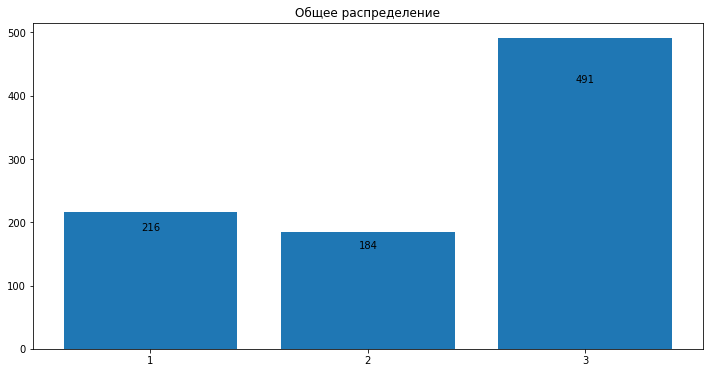

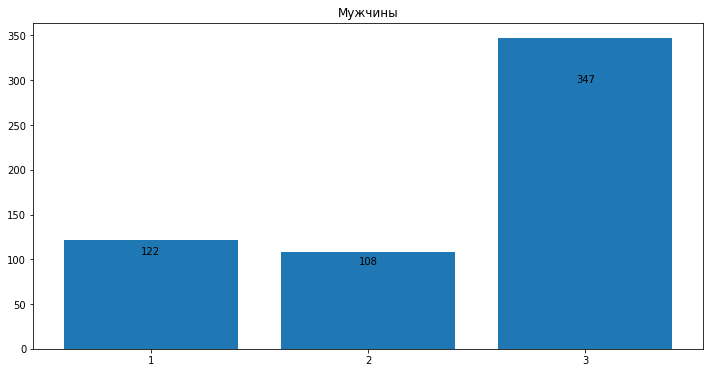

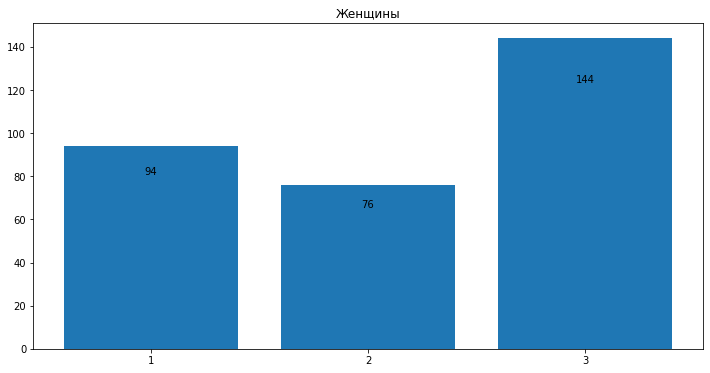

Вариант ответа - 2


In [8]:
def autolabel(axis_x, labels=None, height_factor=1.01):                     #функция расстановки меток
    for i, rect in enumerate(axis_x.patches):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        axis_x.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')
def count_vals(df):                                                         #функция расчета количества и сортировки датафрейма
    _dict = dict(Counter(df))
    return list(OrderedDict(sorted(_dict.items())).values())

#ваш код здесь
total_pclass = dict(Counter(df.Pclass)).values()                            #всего классов
x = np.arange(1,len(total_pclass)+1)                                        #ось X
#print(x)
#print(pd.crosstab(df['Pclass'], df['Sex'], margins=True))

y = count_vals(df.Pclass)                                                   #ось Y
yMen = count_vals(df[df["Sex"].isin(['male'])].Pclass)
yWomen = count_vals(df[df["Sex"].isin(['female'])].Pclass)

fig, ax = plt.subplots()                                                    #Иницализация графика
figMen, axMen = plt.subplots()
figWomen, axWomen = plt.subplots()

ax.xaxis.set_major_locator(MaxNLocator(integer=True))                       #Установка целых чисел оси X
axMen.xaxis.set_major_locator(MaxNLocator(integer=True))
axWomen.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.bar(x, y)                                                                #Инициализация осей
axMen.bar(x, yMen)
axWomen.bar(x, yWomen)

ax.title.set_text('Общее распределение')
axMen.title.set_text('Мужчины')
axWomen.title.set_text('Женщины')

fig.set_figwidth(12);figMen.set_figwidth(12);figWomen.set_figwidth(12)      #ширина фигуры
fig.set_figheight(6);figMen.set_figheight(6); figWomen.set_figheight(6)     #высота фигуры

autolabel(ax,height_factor=0.85)                                            #Установка метки
autolabel(axMen,height_factor=0.85)
autolabel(axWomen,height_factor=0.85)

plt.show()
print('Вариант ответа - 2')

#####  3. Каковы медиана и стандартное отклонение платежей (Fare)? 

Напишите код и правильный вариант ответа

1) Медиана – 14.45, стандартное отклонение – 49.69

2) Медиана – 15.1, стандартное отклонение – 12.15

3) Медиана – 13.15, стандартное отклонение – 35.3

4) Медиана – 17.43, стандартное отклонение – 39.1

In [9]:
#ваш код здесь
print("Медиана: ", round(df['Fare'].median(), 2))
print("Стандартное отклонение: ", round(df['Fare'].std(), 2))
print('Вариант ответа - 1')

Медиана:  14.45
Стандартное отклонение:  49.69
Вариант ответа - 1



##### 4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?

Напишите код и правильный вариант ответа

1) 22.7% среди молодых и 40.6% среди старых

2) 40.6% среди молодых и 22.7% среди старых

3) 35.3% среди молодых и 27.4% среди старых

4) 27.4% среди молодых и 35.3% среди старых

In [10]:
#ваш код здесь
young_survived = df[df['Age'] < 30]['Survived']
old_survived = df[df['Age'] > 60]['Survived']

print("Доли выживших: \n\t среди молодых {}%, \n\t среди старых {}%.".format(
    round(100 * young_survived.mean(), 1),
        round(100 * old_survived.mean(), 1)))
print('Вариант ответа - 2')

Доли выживших: 
	 среди молодых 40.6%, 
	 среди старых 22.7%.
Вариант ответа - 2


##### 5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?

Напишите код и правильный вариант ответа

1) 30.2% среди мужчин и 46.2% среди женщин

2) 35.7% среди мужчин и 74.2% среди женщин

3) 21.1% среди мужчин и 46.2% среди женщин

4) 18.9% среди мужчин и 74.2% среди женщин


In [11]:
#ваш код здесь
male_survived = df[df['Sex'] == 'male']['Survived']
female_survived = df[df['Sex'] == 'female']['Survived']

print("Доли выживыших: \n\t среди женщин {}%, \n\t среди мужчин {}%".format(
    round(100 * female_survived.mean(), 1), round(100 * male_survived.mean(), 1)))
print('Вариант ответа - 4')

Доли выживыших: 
	 среди женщин 74.2%, 
	 среди мужчин 18.9%
Вариант ответа - 4


##### 6. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?

Напишите код и правильный вариант ответа

1) Да

2) Нет


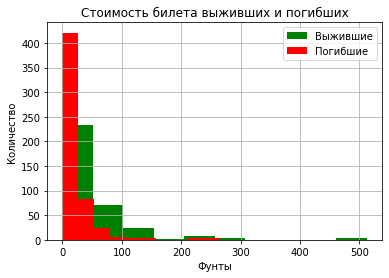

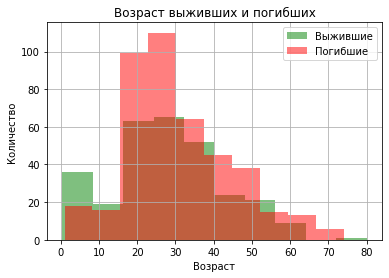

Вариант ответа - 1


In [48]:
# ваш код здесь
import pandas as pd
import matplotlib.pyplot as plt
df[df['Survived'] == 1]['Fare'].hist(color="green",
                                         label='Выжившие')
df[df['Survived'] == 0]['Fare'].hist(color="red",
                                         label='Погибшие')
plt.title('Стоимость билета выживших и погибших')
plt.xlabel('Фунты')
plt.ylabel('Количество')
plt.legend()
plt.show()

df[df['Survived'] == 1]['Age'].hist(color="green",
                                         label='Выжившие', alpha=.5)
df[df['Survived'] == 0]['Age'].hist(color="red",
                                         label='Погибшие', alpha=.5)
plt.title('Возраст выживших и погибших')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.legend()
plt.show()

df.groupby('Survived')['Age'].mean()
print('Вариант ответа - 1')




##### 7. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:

Напишите код и правильный вариант ответа

1) В среднем мужчины 1-го класса старше 40 лет

2) В среднем женщины 1-го класса старше 40 лет

3) Мужчины всех классов в среднем старше женщин того же класса

4) В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [49]:
#ваш код здесь
pd.crosstab(df['Pclass'], df['Sex'],
            values=df['Age'], aggfunc=np.mean)
print('Вариант ответа - 1,3,4')

Sex,female,male
Pclass,,
1,34.611765,41.281386
2,28.722973,30.740707
3,21.750000,26.507589


##### 8. Постройте попарные зависимости признаков Age, Fare, Pclass, Sex, SibSp, Parch, Embarked и Survived. (метод scatter_matrix Pandas или pairplot Seaborn).

Напишите код и визуализируйте

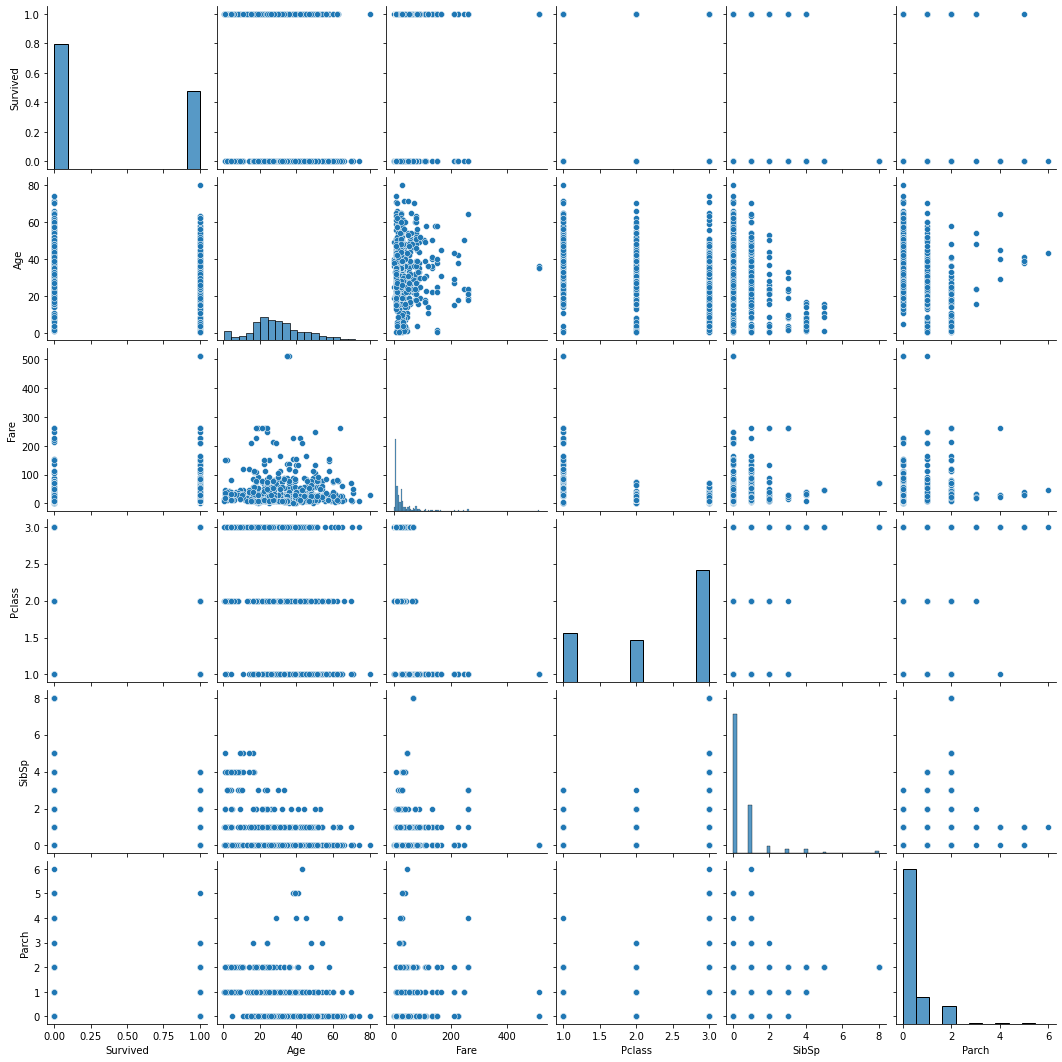

In [50]:
#ваш код здесь
sns.pairplot(df[['Survived', 'Age', 'Fare',
                       'Pclass', 'Sex', 'SibSp',
                       'Parch', 'Embarked']])

##### 9. Как плата за билет (Fare) зависит от класса каюты (Pclass)? Постройте boxplot.

Напишите код и визуализируйте

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

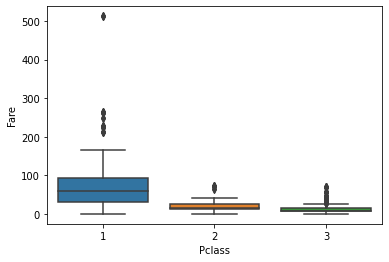

In [52]:
#ваш код здесь
sns.boxplot(x='Pclass', y='Fare', data=df)

##### 10. Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.

Напишите код и визуализируйте

In [53]:
#ваш код здесь
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


##### 11. Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.

Напишите код и визуализируйте

<AxesSubplot:xlabel='Pclass', ylabel='count'>

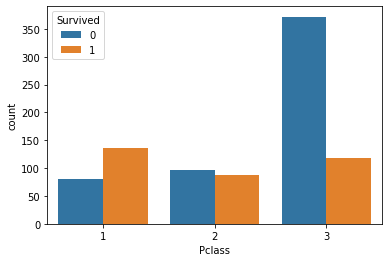

In [54]:
#ваш код здесь
sns.countplot(x="Pclass", hue="Survived", data=df)

##### 12. Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.

Напишите код и визуализируйте

<AxesSubplot:xlabel='age_cat', ylabel='count'>

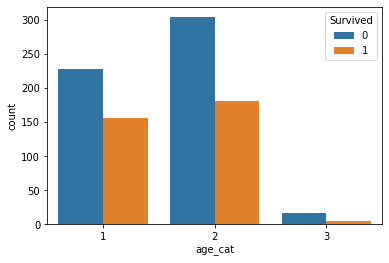

In [56]:
#ваш код здесь
df['age_cat'] = df['Age'].apply(lambda age: 1 if age < 30
                                            else 3 if age > 60 else 2)
sns.countplot(x='age_cat', hue='Survived', data=df)